## Going Beyond Bias-Variance Tradeoff Into Double Descent Phenomenon

Bias-variance tradeoff is a fundamental knowledge that will guide us towards improving our trained models, by learning from the errors.

#### Establishing Terminology

- **Machine Learning Lifecycle**: Each supervised machine learning life cycle includes a training process where the model learns the underlying patterns of the training data. The error that is measured during training time is called "train error". We expect the train error to decrease, the longer we train the model, which indicates the model is learning the training data. Then the train model is used to make predictions on a test set, which the model has not seen before. The predictions are not going to be perfect and therefore there is always expected to exist an error when testing a trained model, which is called "test error". We measure the "test error" and then use various tools to improve the model and therefore lowering the "test error". In other words, the lower the "test error", the better the trained model is. We can almost say that the goal of a machine learning exercise is to lower the "test error".

- **Underfit and Overfit Models**: Models that we train are not going to be perfect. When a model is too simple to capture the underlying details of training data, it is called an "underfit" model. Usually what we see here is that the model has a high train error, since it did not manage to learn the training data well and understandably the test error will also be high. "Overfit" models are the other side of underfit models. When a model learns too much of the details of the training data, such as learning the existing noise in the training data, it is called an "overfitted" model. In these cases, we usually see that train error is low, since the model learned the training data very well, but the test error is surprisingly high, which implies that the model did not generalize well and is not useful for making actual predictions. Remember that the goal of the machine learning exercise was to lower the test error at the end. In "overfit" scenarios, even though the train error is low, the test error is high and therefore that is not a satisfactory outcome. Now that we understand test error is the important piece of the puzzle and are familiar with overfit and underfit scenarios, let's dive deeper into components of test error.

- **Bias vs. Variance**: Test error can be broken down into two components, which are bias and variance. Bias is the error due to over simplistic models so we can imagine a high bias is indicative of underfitting. Variance on the other hand is the error due to overly-complex models. In other words, high variance indicates overfitting. So, here’s the mappping you want to remember — bias is related to underfit and variance is related to overfit.

#### Bias-Variance Tradeoff

In [1]:
import warnings
warnings.filterwarnings('ignore')

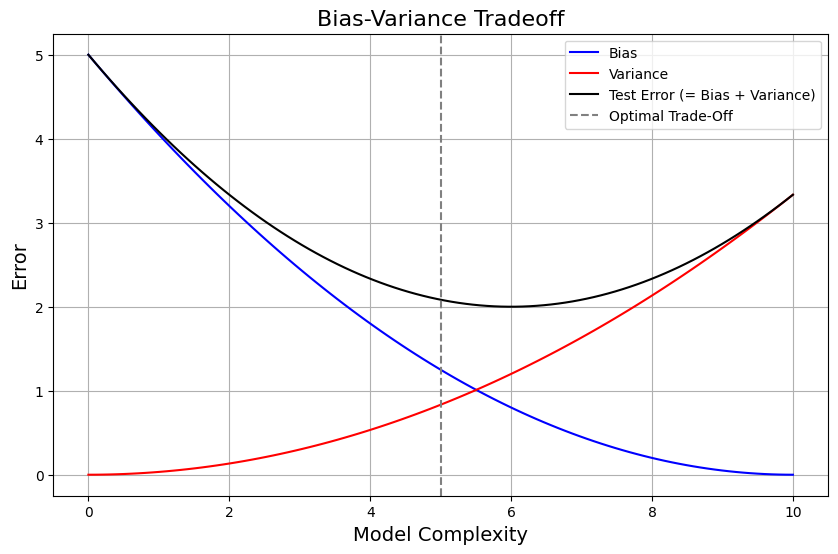

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# generate values for model complexity
model_complexity = np.linspace(0, 10, 100)

# define functions for bias, variance, and test error
bias_squared = (10 - model_complexity) ** 2 / 20
variance = model_complexity ** 2 / 30

# test error is bias and variance together
test_error = bias_squared + variance

# plot
plt.figure(figsize=(10, 6))
plt.plot(model_complexity, bias_squared, label=r'Bias', color='blue')
plt.plot(model_complexity, variance, label='Variance', color='red')
plt.plot(model_complexity, test_error, label='Test Error (= Bias + Variance)', color='black')

# labels, title and legend
plt.xlabel('Model Complexity', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.title('Bias-Variance Tradeoff', fontsize=16)
plt.axvline(x=5, color='gray', linestyle='--', label='Optimal Trade-Off')
plt.legend()
plt.grid(True)
plt.show()

The bias (blue line) starts quite high at the top left corner for a simplistic model and as the model complexity in the x-axis increases, the bias (blue line) decreases and the variance (red line) increases. The black line is the test error, which is the summation of bias and variance.

The term "trade-off" refers to the fact that as we can see, the overall test error (black line) starts at high in the top left corner, then it improves as model complexity increases up to an optimal point and then it starts to go up again.

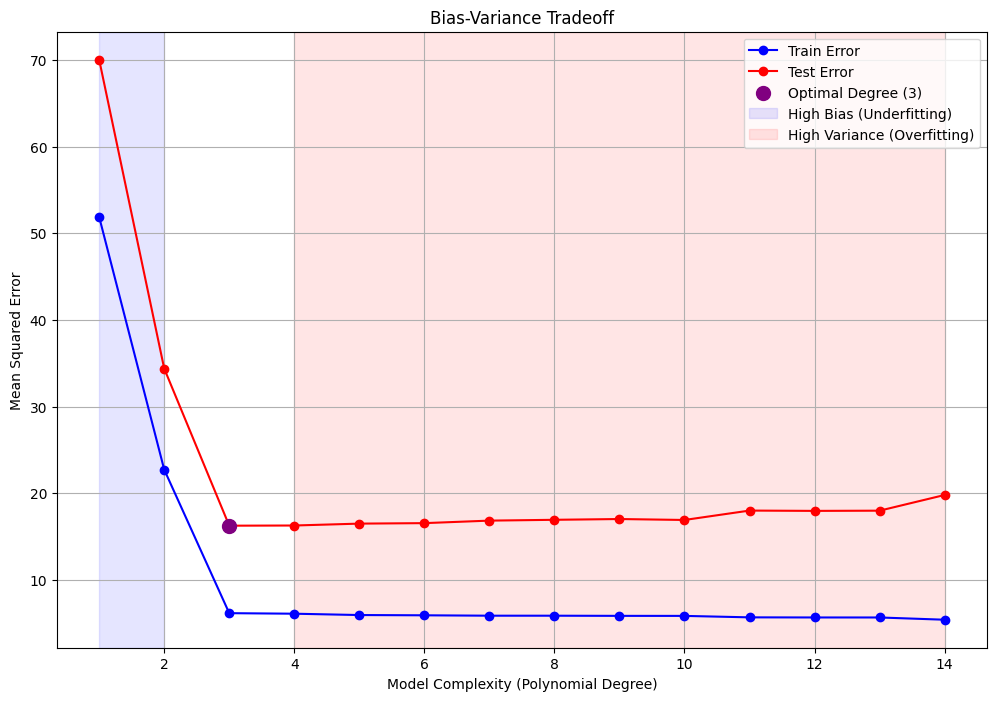

In [3]:
# import libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# generate synthetic data
np.random.seed(1234)
X = np.linspace(-3, 3, 100)
y = X**3 - 2*X**2 + X + np.random.normal(0, 3, X.shape[0])

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# variables to store error
train_errors = []
test_errors = []
degrees = range(1, 15)

# loop over degrees to fit polynomial models of increasing complexity
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # calculate errors
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# optimal degree where test error is minimized
optimal_degree = degrees[np.argmin(test_errors)]

# plot
plt.figure(figsize=(12, 8))

plt.plot(degrees, train_errors, label="Train Error", marker='o', linestyle='-', color='b')
plt.plot(degrees, test_errors, label="Test Error", marker='o', linestyle='-', color='r')

plt.scatter(optimal_degree, min(test_errors), color="purple", s=100, label=f"Optimal Degree ({optimal_degree})", zorder=5)

plt.axvspan(degrees[0], optimal_degree - 1, color="blue", alpha=0.1, label="High Bias (Underfitting)")
plt.axvspan(optimal_degree + 1, degrees[-1], color="red", alpha=0.1, label="High Variance (Overfitting)")

plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Mean Squared Error")
plt.title("Bias-Variance Tradeoff")
plt.legend()
plt.grid(True)
plt.show()

The x-axis depicts model complexity, as measured by the polynomial degree of the linear regression model used for training and the y-axis depicts the error.

As the model complexity increases, we see that both train and test set decrease in the area where we have identified as the “high bias” in light blue shade.

Train error continues decreasing as the model gets more complex but the test error starts increasing slowly. This is the area that is shaded in light red and depicts the definition of overfitting or high variance where train error is low but test error is high and therefore model does not generalize well.

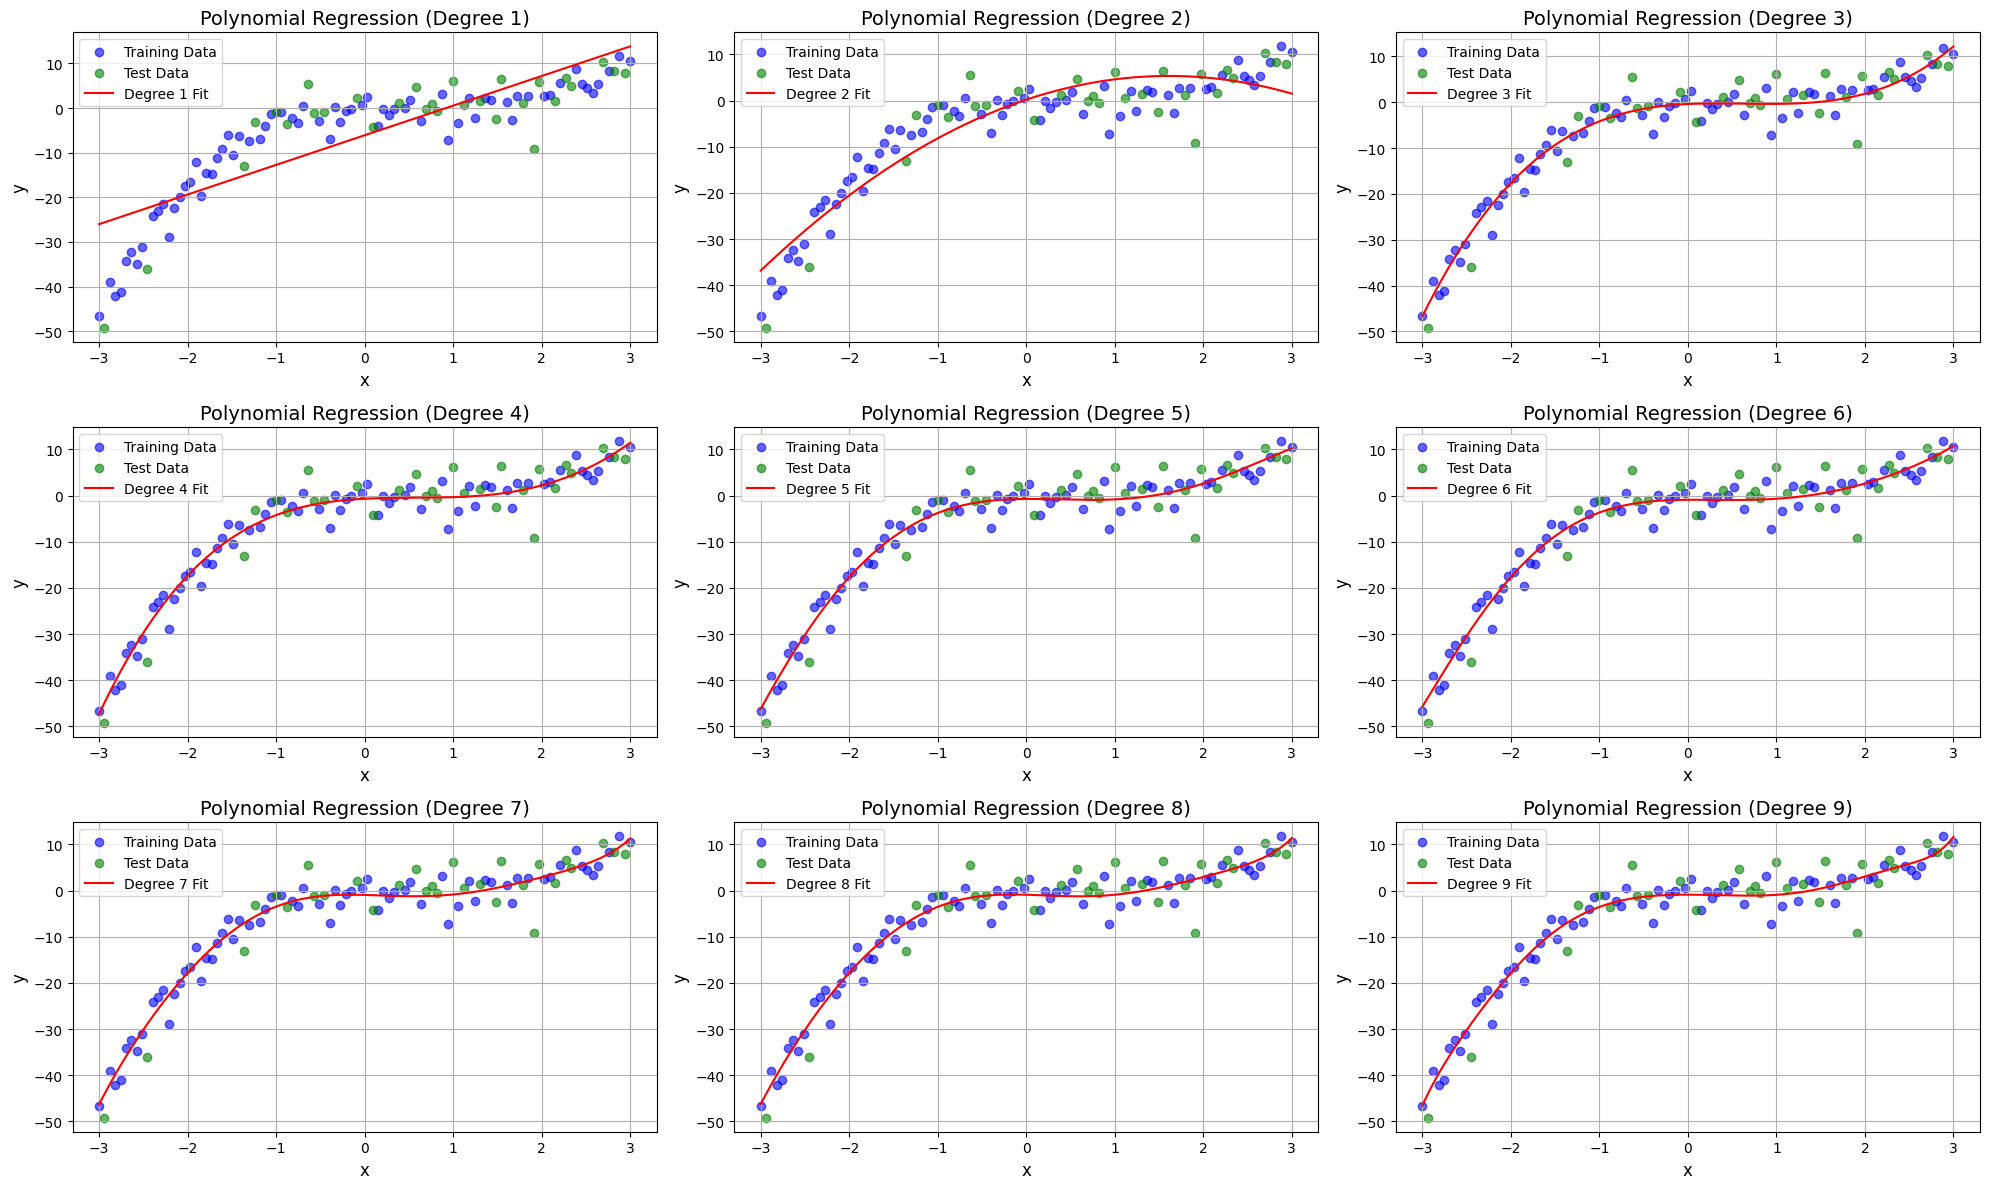

MSE Values across Polynomial Degrees
  Degree  Train MSE  Test MSE
0      1      51.89     70.06
1      2      22.71     34.39
2      3       6.13     16.24
3      4       6.07     16.26
4      5       5.92     16.48
5      6       5.89     16.53
6      7       5.84     16.82
7      8       5.84     16.92
8      9       5.82     17.01


In [4]:
# import libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# generate synthetic data
np.random.seed(1234)
X = np.linspace(-3, 3, 100)
y = X**3 - 2*X**2 + X + np.random.normal(0, 3, X.shape[0])

# split data into training and test sets, using what we had in the previous section
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# lists to store errors (mean squared error or mse)
train_mse_list = []
test_mse_list = []

# create figure for subplots
plt.figure(figsize=(20, 12))

# plot polynomial regression fits for degrees 1 to 9
degrees = range(1, 10)
for i, degree in enumerate(degrees, 1):
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    X_range = np.linspace(-3, 3, 500).reshape(-1, 1)
    X_range_poly = poly_features.transform(X_range)
    y_range_pred = model.predict(X_range_poly)
    
    # calculate errors and store
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)
    
    # subplot
    plt.subplot(3, 3, i)
    plt.scatter(X_train, y_train, color="blue", label="Training Data", alpha=0.6)
    plt.scatter(X_test, y_test, color="green", label="Test Data", alpha=0.6)
    plt.plot(X_range, y_range_pred, color="red", label=f"Degree {degree} Fit")
    plt.title(f"Polynomial Regression (Degree {degree})", fontsize=14)
    plt.xlabel("x", fontsize=12)
    plt.ylabel("y", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)

# adjust layout and show
plt.tight_layout()
plt.show()

# dataframe for errors
mse_df = pd.DataFrame({
    "Degree": [f"{d}" for d in degrees],
    "Train MSE": [round(mse, 2) for mse in train_mse_list],
    "Test MSE": [round(mse, 2) for mse in test_mse_list]
})

# display errors
print("MSE Values across Polynomial Degrees")
print(mse_df)

#### Double Descent Phenomenon

The model complexity can impact generalization of a trained model, as follows:

1. **First Descent**: As model complexity increases from small to moderate sizes (the area shaded in blue in the previous section’s graph), test error decreases, reaching the sweet spot with the lowest amount of test error (the area between the blue and red shades in the previous section’s graph).

2. **Overfitting Ascent**: As the complexity increases, the test error continues to increase (the area shaded in red in the previous graph) until we reach an overfitting peak.

The test error initially lower as the complexity of the model increases, reaching a sweet spot and then start increasing, which implies entering the overfitted zone. 

In [5]:
# import libraries
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

# set random seeds for numpy and tensorflow
np.random.seed(1234)
tf.random.set_seed(1234)

# generate synthetic data
n_samples = 500
X = np.random.uniform(-2, 2, (n_samples, 1))
y = np.sin(5 * X) / (5 * X) + np.random.normal(0, 0.05, (n_samples, 1))  # Non-linear function with noise

# split data into training and test sets
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=1234
)
n_train = X_train.shape[0]

# lists to store errors and model complexities
train_errors = []
test_errors = []
model_complexities = []

# range of model complexities (number of hidden units)
hidden_units_list = list(range(1, 20)) + list(range(20, 100, 5)) + list(range(100, 500, 20))

for hidden_units in hidden_units_list:
    # build neural network model
    model = models.Sequential()
    model.add(layers.Dense(hidden_units, activation='relu', input_shape=(1,)))
    model.add(layers.Dense(1))
    
    # compile with adam optimizer and mse for loss
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # train
    history = model.fit(
        X_train, y_train, 
        epochs=200, 
        batch_size=n_train,  # batch gradient descent
        verbose=0, 
        validation_data=(X_test, y_test)
    )
    
    # evaluate train & test error
    train_error = history.history['loss'][-1]
    test_error = history.history['val_loss'][-1]
    
    # record errors and model complexity
    train_errors.append(train_error)
    test_errors.append(test_error)
    
    # total number of parameters
    total_params = hidden_units * (1 + 1) + hidden_units + 1  # weights and biases
    model_complexities.append(total_params)

# convert lists to arrays
train_errors = np.array(train_errors)
test_errors = np.array(test_errors)
model_complexities = np.array(model_complexities)

# plotting errors
plt.figure(figsize=(12, 6))

# plot
plt.plot(model_complexities, train_errors, label='Training Error', marker='o')
plt.plot(model_complexities, test_errors, label='Test Error', marker='o')

# highlight interpolation threshold
plt.axvline(x=n_train, color='k', linestyle='--', label='Interpolation Threshold (n = {})'.format(n_train))

# log scale for errors
plt.yscale('log')

plt.xlabel('Model Complexity (Number of Parameters)')
plt.ylabel('Mean Squared Error (Log Scale)')
plt.title('Double Descent Phenomenon in Neural Networks')
plt.legend()
plt.grid(True)

# adjust x-axis limits to focus on key regions
plt.xlim([0, max(model_complexities) + 10])

# show plot
plt.show()

KeyboardInterrupt: 